In [2]:
from regular_backtesting.Backtest import regular_Backtest
from regular_backtesting.basic import ratio_adjustment, rate_of_return
from regular_backtesting.momentum import relative_momentum, relative_momentum_test, dual_momentum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
etf_price  = pd.read_csv('data_directory/etf_price.csv', header=[0,1], index_col=0)
stock_price = pd.read_csv('data_directory/stock_price.csv', header=[0,1], index_col=0)

etf_price.index = list(map(str, etf_price.index))
stock_price.index = list(map(str, stock_price.index))

In [4]:
korea_corporation = pd.read_csv('data_directory/korea_corporation.csv')
korea_corporation = korea_corporation[korea_corporation['주식종류'] == '보통주']
kospi = korea_corporation[korea_corporation['시장구분'] == 'KOSPI'][['단축코드','한글 종목약명']].reset_index(drop=True)
kosdaq = korea_corporation[korea_corporation['시장구분'] == 'KOSDAQ'][['단축코드','한글 종목약명']].reset_index(drop=True)
kospi_200 = pd.read_csv('data_directory/kospi_200.csv', index_col = 0)

# kospi 기업 대상 상대적 모멘텀 효과 없다.

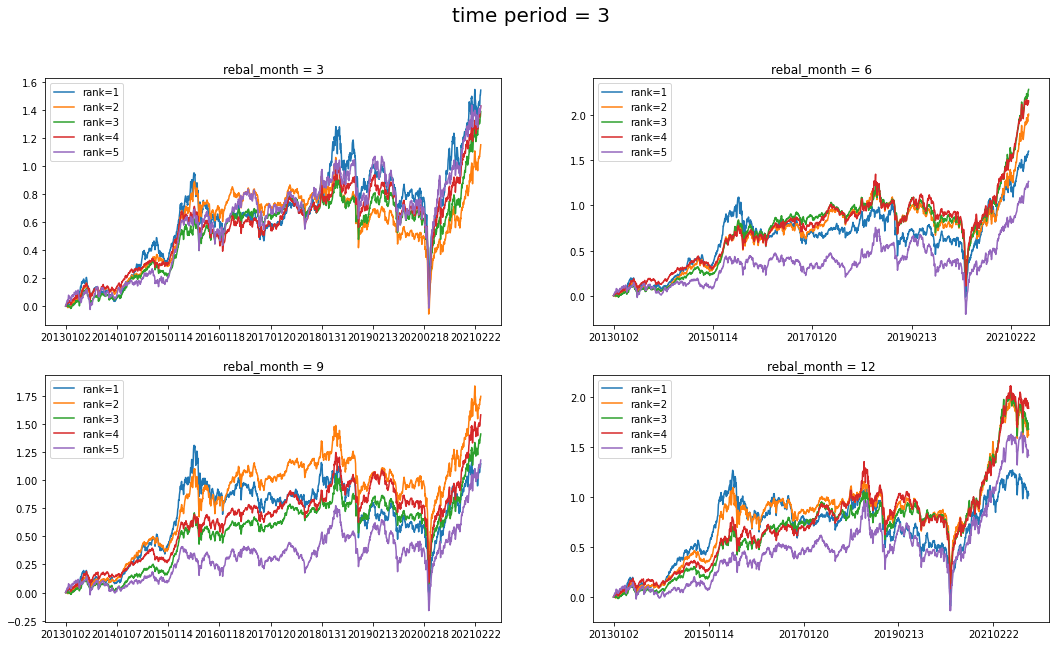

In [5]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi['단축코드'], time_period = 3, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 3', fontsize=20)
plt.show()

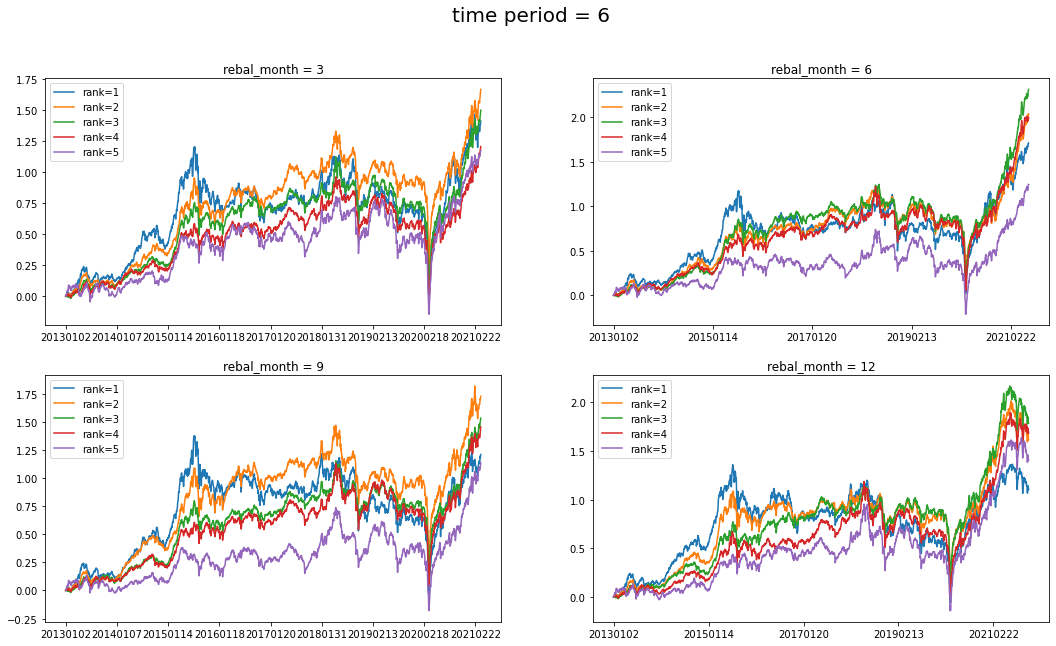

In [6]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi['단축코드'], time_period = 6, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 6', fontsize=20)
plt.show()

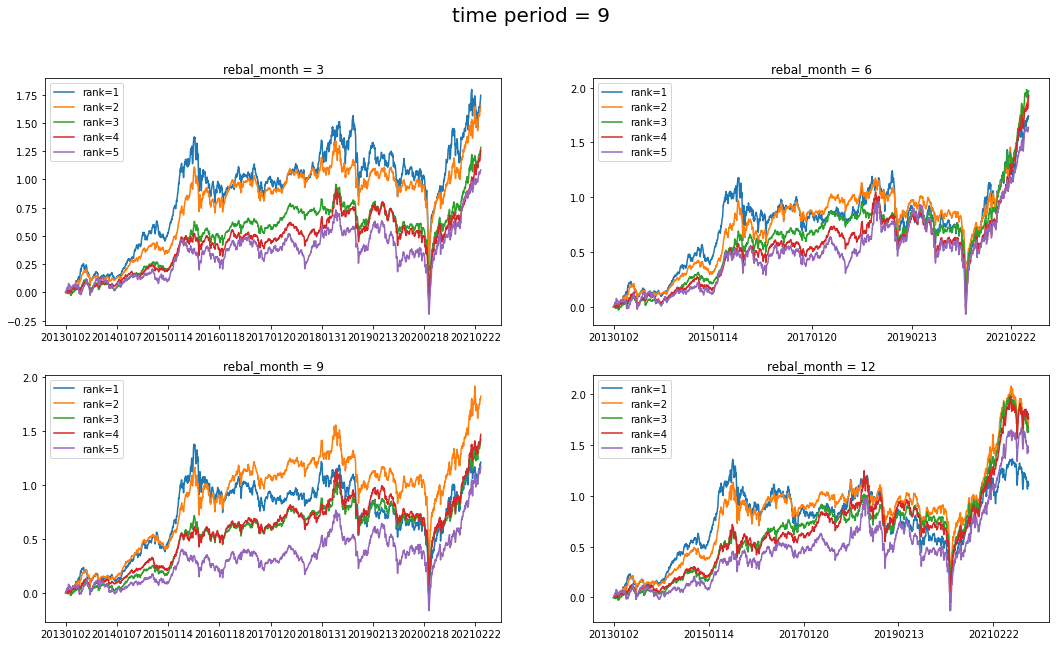

In [7]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi['단축코드'], time_period = 9, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 9', fontsize=20)
plt.show()

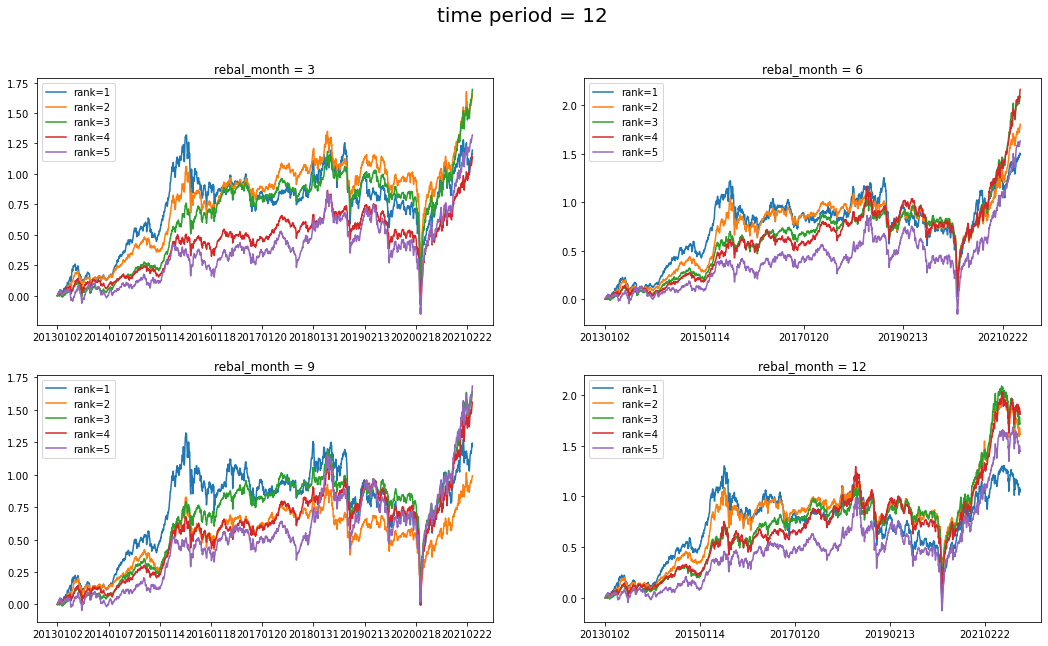

In [8]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi['단축코드'], time_period = 12, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 12', fontsize=20)
plt.show()

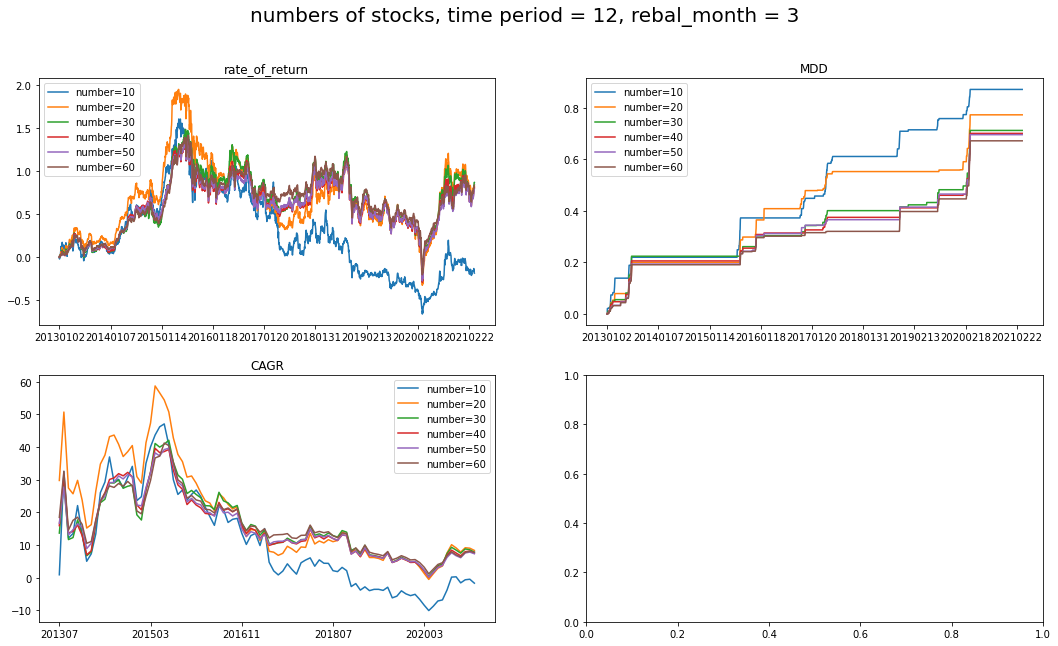

In [9]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [10,20,30,40,50,60]

for number in numbers:
    dual = relative_momentum(stocks = kospi['단축코드'], time_period = 12, momentum_number = number)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[0], label=f'number={number}')
    dl.balance['MDD'].plot(ax=ax[1], label=f'number={number}')
    dl.CAGR.plot(ax=ax[2], label=f'number={number}')
    

ax[0].legend()
ax[0].set_title("rate_of_return")
ax[1].legend()
ax[1].set_title("MDD")
ax[2].legend()
ax[2].set_title("CAGR")

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

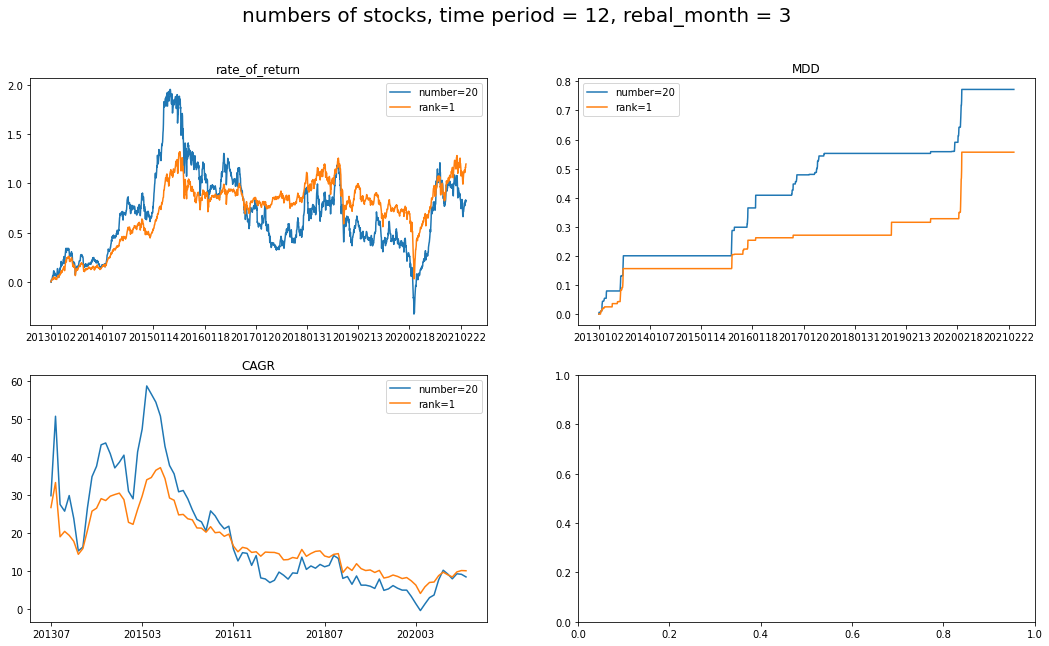

In [10]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

number = 20
i = 1

dual = relative_momentum(stocks = kospi['단축코드'], time_period = 12, momentum_number = 20)
dl = regular_Backtest(stock_price, dual, seed_money=100000000)
dl.fit(start, end, rebal_month=3)
dl.balance['rate_of_return'].plot(ax=ax[0], label=f'number={number}')
dl.balance['MDD'].plot(ax=ax[1], label=f'number={number}')
dl.CAGR.plot(ax=ax[2], label=f'number={number}')
    
dual = relative_momentum_test(stocks = kospi['단축코드'], time_period = 12, rank=1)
dl = regular_Backtest(stock_price, dual, seed_money=100000000)
dl.fit(start, end, rebal_month=3)
dl.balance['rate_of_return'].plot(ax=ax[0], label=f'rank={i}')
dl.balance['MDD'].plot(ax=ax[1], label=f'rank={i}')
dl.CAGR.plot(ax=ax[2], label=f'rank={i}')


ax[0].legend()
ax[0].set_title("rate_of_return")
ax[1].legend()
ax[1].set_title("MDD")
ax[2].legend()
ax[2].set_title("CAGR")

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()